In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Algerian_forest_fires_dataset_UPDATE.csv')

In [3]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,1,6,2012,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,not fire
1,2,6,2012,30,73,13,4.0,55.7,2.7,7.8,0.6,2.9,0.2,not fire
2,3,6,2012,29,80,14,2.0,48.7,2.2,7.6,0.3,2.6,0.1,not fire
3,4,6,2012,30,64,14,0.0,79.4,5.2,15.4,2.2,5.6,1,not fire
4,5,6,2012,32,60,14,0.2,77.1,6.0,17.6,1.8,6.5,0.9,not fire


Attribute Information:

Date : (DD/MM/YYYY) Day, month ('june' to 'september'), year (2012)

Weather data observations

Temp : temperature noon (temperature max) in Celsius degrees: 22 to 42

RH : Relative Humidity in %: 21 to 90

Ws :Wind speed in km/h: 6 to 29

Rain: total day in mm: 0 to 16.8

FWI Components

Fine Fuel Moisture Code (FFMC) index from the FWI system: 28.6 to 92.5

Duff Moisture Code (DMC) index from the FWI system: 1.1 to 65.9

Drought Code (DC) index from the FWI system: 7 to 220.4

Initial Spread Index (ISI) index from the FWI system: 0 to 18.5

Buildup Index (BUI) index from the FWI system: 1.1 to 68

Fire Weather Index (FWI) Index: 0 to 31.1

Classes: two classes, namely Fire and not Fire


In [4]:
df.shape

(122, 14)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          122 non-null    int64  
 1   month        122 non-null    int64  
 2   year         122 non-null    int64  
 3   Temperature  122 non-null    int64  
 4    RH          122 non-null    int64  
 5    Ws          122 non-null    int64  
 6   Rain         122 non-null    float64
 7   FFMC         122 non-null    float64
 8   DMC          122 non-null    float64
 9   DC           122 non-null    object 
 10  ISI          122 non-null    float64
 11  BUI          122 non-null    float64
 12  FWI          122 non-null    object 
 13  Classes      121 non-null    object 
dtypes: float64(5), int64(6), object(3)
memory usage: 13.5+ KB


# Data Cleaning

In [6]:
df.isna().sum()

day            0
month          0
year           0
Temperature    0
 RH            0
 Ws            0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        1
dtype: int64

In [ ]:
df[df.isnull().any(axis = 1)]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
43,14,7,2012,37,37,18,0.2,88.9,12.9,14.6 9,12.5,10.4,fire,NaN


In [8]:
df = df.dropna()

In [9]:
df.isna().sum()

day            0
month          0
year           0
Temperature    0
 RH            0
 Ws            0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
dtype: int64

In [10]:
df.columns

Index(['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes  '],
      dtype='object')

In [11]:
df.columns = df.columns.str.strip()
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes'],
      dtype='object')

In [12]:
df.describe()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,ISI,BUI
count,121.000000,121.000000,121.0,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000
mean,15.768595,7.504132,2012.0,33.132231,56.057851,14.983471,0.682645,81.038017,17.066116,5.838017,17.965289
std,8.878589,1.118958,0.0,3.674103,15.686139,2.689434,1.492296,12.274182,13.043604,4.815068,13.919595
min,1.000000,6.000000,2012.0,24.000000,21.000000,6.000000,0.000000,37.900000,0.900000,0.100000,1.400000
25%,8.000000,7.000000,2012.0,30.000000,44.000000,14.000000,0.000000,77.500000,7.200000,1.800000,7.300000
50%,16.000000,8.000000,2012.0,34.000000,56.000000,15.000000,0.000000,84.700000,13.300000,4.500000,14.100000
75%,23.000000,8.000000,2012.0,36.000000,67.000000,16.000000,0.500000,89.300000,23.000000,8.400000,23.900000
max,31.000000,9.000000,2012.0,42.000000,90.000000,29.000000,8.700000,96.000000,65.900000,19.000000,68.000000


In [13]:
df_copy = df.drop(['day', 'month', 'year'], axis = 1)

In [ ]:
df_copy.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,not fire
1,30,73,13,4.0,55.7,2.7,7.8,0.6,2.9,0.2,not fire
2,29,80,14,2.0,48.7,2.2,7.6,0.3,2.6,0.1,not fire
3,30,64,14,0.0,79.4,5.2,15.4,2.2,5.6,1,not fire
4,32,60,14,0.2,77.1,6.0,17.6,1.8,6.5,0.9,not fire


In [15]:
df_copy['Classes'].value_counts()

Classes
fire             78
not fire         41
not fire          1
not fire          1
Name: count, dtype: int64

In [16]:
df_copy['Classes'].unique()

array(['not fire   ', 'fire   ', 'not fire     ', 'not fire    '],
      dtype=object)

In [17]:
df_copy['Classes'] = df_copy['Classes'].str.strip()

In [18]:
df_copy['Classes'].unique()

array(['not fire', 'fire'], dtype=object)

In [19]:
df_copy['Classes'] = df_copy['Classes'].map({'fire': 1, 'not fire': 0})

In [20]:
df_copy.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,0
1,30,73,13,4.0,55.7,2.7,7.8,0.6,2.9,0.2,0
2,29,80,14,2.0,48.7,2.2,7.6,0.3,2.6,0.1,0
3,30,64,14,0.0,79.4,5.2,15.4,2.2,5.6,1,0
4,32,60,14,0.2,77.1,6.0,17.6,1.8,6.5,0.9,0


In [21]:
df_copy.tail()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
117,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,1
118,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,0
119,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,0
120,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,0
121,24,64,15,0.2,67.3,3.8,16.5,1.2,4.8,0.5,0


In [22]:
df_copy['Classes'].value_counts()

Classes
1    78
0    43
Name: count, dtype: int64

# Data Visualizations

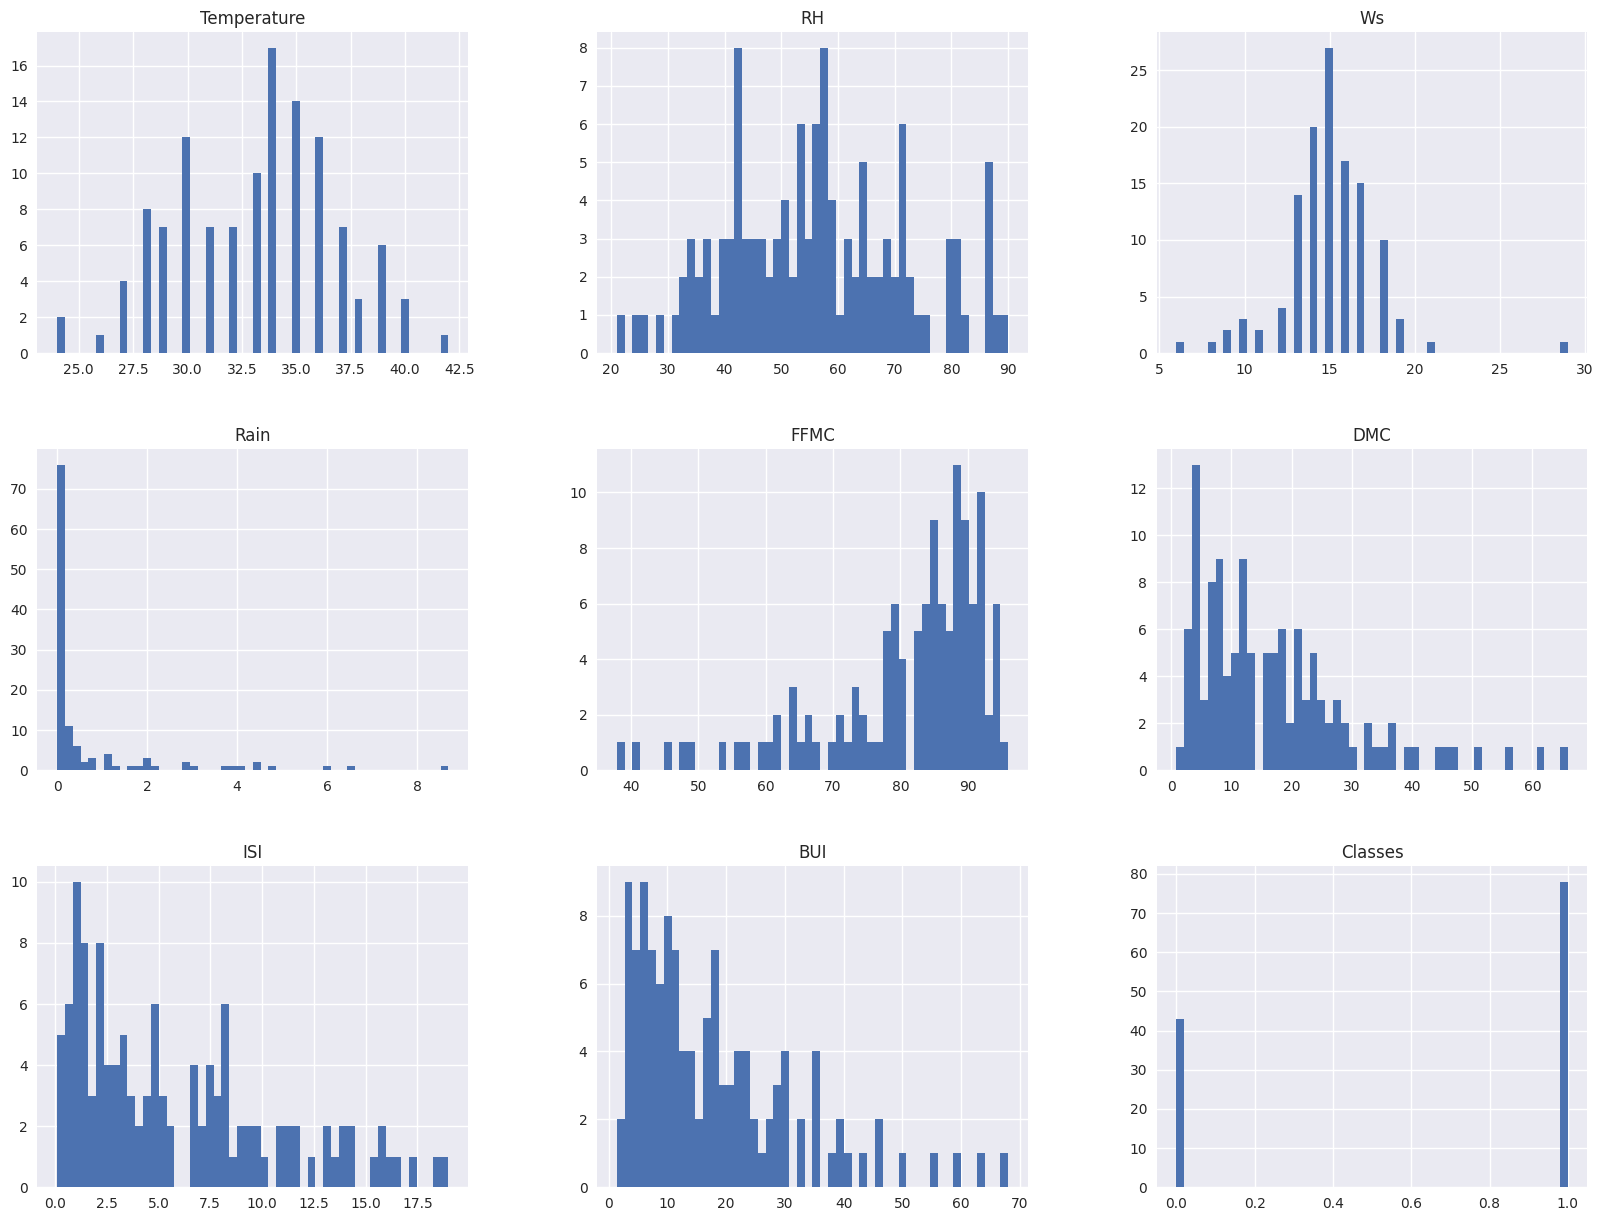

In [23]:
plt.style.use('seaborn-v0_8')
df_copy.hist(bins = 50, figsize = (20, 15))
plt.show()

In [24]:
percentage = df_copy['Classes'].value_counts(normalize = True) * 100

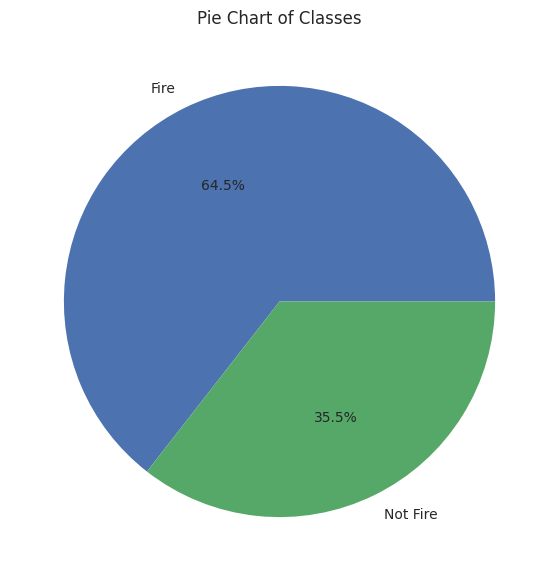

In [25]:
classlabels = ["Fire", "Not Fire"]
plt.figure(figsize = (12, 7))
plt.pie(percentage, labels = classlabels, autopct = '%1.1f%%')
plt.title("Pie Chart of Classes")
plt.show()

In [26]:
df_copy.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
Temperature,1.000000,-0.594127,-0.270491,-0.127553,0.571143,0.394472,0.292707,0.535954,0.373088,0.500971,0.498754
RH,-0.594127,1.000000,0.154297,0.146750,-0.644134,-0.384730,-0.275144,-0.691191,-0.367170,-0.605856,-0.440500
Ws,-0.270491,0.154297,1.000000,-0.137527,-0.025478,0.031887,0.023962,0.128558,0.033553,0.106128,0.046994
Rain,-0.127553,0.146750,-0.137527,1.000000,-0.509872,-0.349583,-0.347646,-0.412636,-0.359493,-0.410213,-0.474590
FFMC,0.571143,-0.644134,-0.025478,-0.509872,1.000000,0.584221,0.486333,0.752513,0.580449,0.719593,0.795500
DMC,0.394472,-0.384730,0.031887,-0.349583,0.584221,1.000000,0.882487,0.631017,0.987926,0.852193,0.537094
DC,0.292707,-0.275144,0.023962,-0.347646,0.486333,0.882487,1.000000,0.474039,0.927774,0.716965,0.464827
ISI,0.535954,-0.691191,0.128558,-0.412636,0.752513,0.631017,0.474039,1.000000,0.612286,0.916427,0.696190
BUI,0.373088,-0.367170,0.033553,-0.359493,0.580449,0.987926,0.927774,0.612286,1.000000,0.844715,0.548840
FWI,0.500971,-0.605856,0.106128,-0.410213,0.719593,0.852193,0.716965,0.916427,0.844715,1.000000,0.684079


<Axes: >

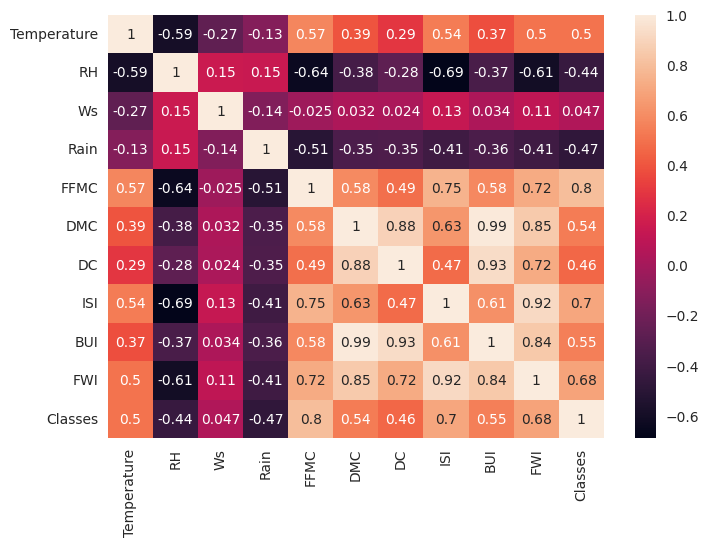

In [27]:
sns.heatmap(df_copy.corr(), annot = True)

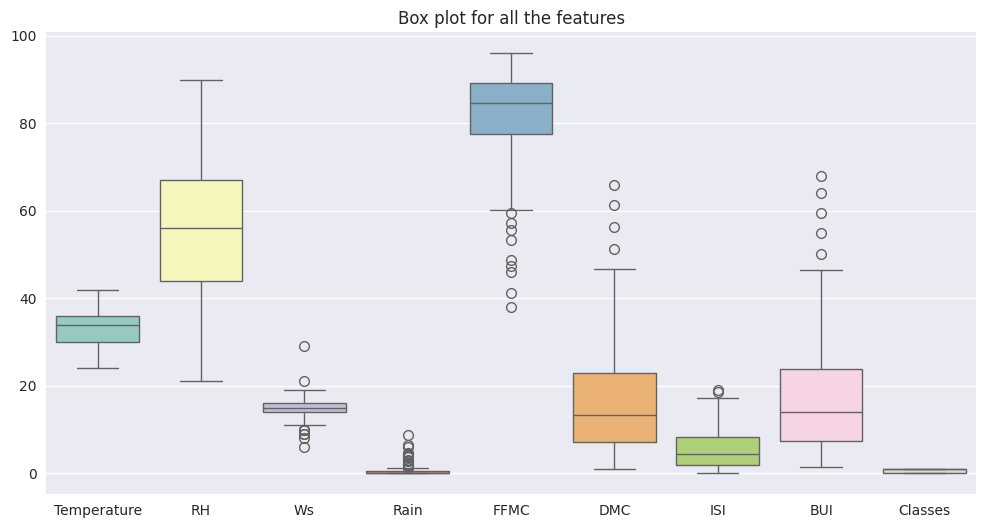

In [28]:
plt.figure(figsize = (12, 6))
sns.boxplot(data = df_copy, palette = "Set3")
plt.title("Box plot for all the features")
plt.show()

In [29]:
df['Classes'] = df['Classes'].str.strip()

Text(0.5, 1.0, 'Fire Analysis of Sidi - Bel Regions')

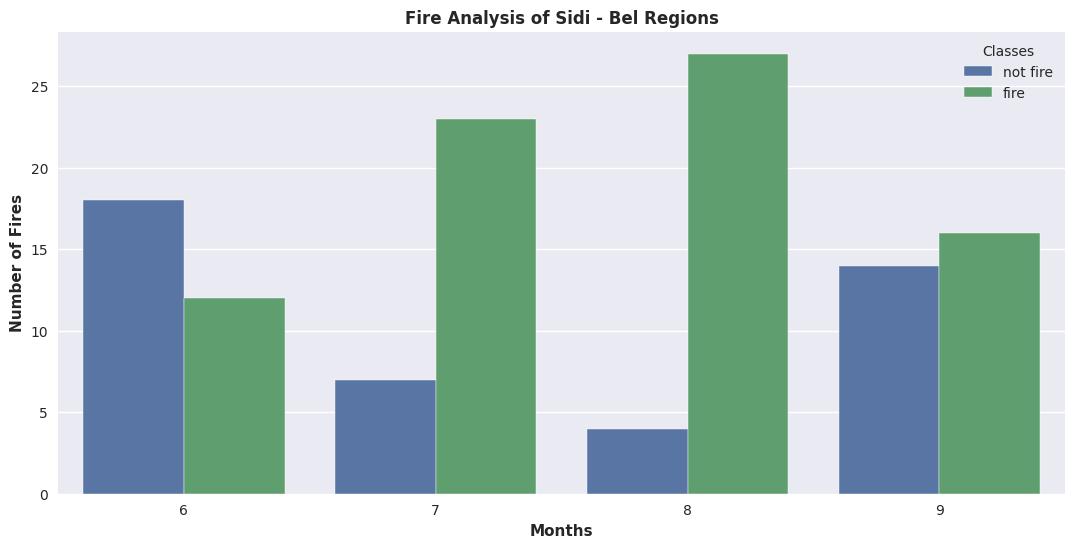

In [30]:
plt.subplots(figsize = (13, 6))
sns.set_style('whitegrid')
sns.countplot(x = 'month', hue = 'Classes', data = df)
plt.ylabel('Number of Fires', weight = 'bold')
plt.xlabel('Months', weight = 'bold')
plt.title('Fire Analysis of Sidi - Bel Regions', weight = 'bold')

There are more number of Fires in the months of July and August due to the summer.

In [31]:
df_copy.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,0
1,30,73,13,4.0,55.7,2.7,7.8,0.6,2.9,0.2,0
2,29,80,14,2.0,48.7,2.2,7.6,0.3,2.6,0.1,0
3,30,64,14,0.0,79.4,5.2,15.4,2.2,5.6,1,0
4,32,60,14,0.2,77.1,6.0,17.6,1.8,6.5,0.9,0


In [32]:
X = df_copy.drop('FWI', axis = 1)
y = df_copy['FWI']

In [33]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

In [34]:
X_train.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes
Temperature,1.000000,-0.516221,-0.148683,-0.135914,0.587525,0.404227,0.331249,0.529565,0.391978,0.519822
RH,-0.516221,1.000000,0.014511,0.195940,-0.673630,-0.369996,-0.274098,-0.701824,-0.356503,-0.466919
Ws,-0.148683,0.014511,1.000000,-0.139414,0.098500,0.089629,0.069449,0.199996,0.087771,0.099408
Rain,-0.135914,0.195940,-0.139414,1.000000,-0.532790,-0.344343,-0.349494,-0.419341,-0.354044,-0.463739
FFMC,0.587525,-0.673630,0.098500,-0.532790,1.000000,0.570826,0.491637,0.767946,0.570128,0.800153
DMC,0.404227,-0.369996,0.089629,-0.344343,0.570826,1.000000,0.919766,0.652202,0.992267,0.532455
DC,0.331249,-0.274098,0.069449,-0.349494,0.491637,0.919766,1.000000,0.511397,0.941726,0.483847
ISI,0.529565,-0.701824,0.199996,-0.419341,0.767946,0.652202,0.511397,1.000000,0.640169,0.704340
BUI,0.391978,-0.356503,0.087771,-0.354044,0.570128,0.992267,0.941726,0.640169,1.000000,0.551610
Classes,0.519822,-0.466919,0.099408,-0.463739,0.800153,0.532455,0.483847,0.704340,0.551610,1.000000


In [35]:
def highly_corr_features(dataset, thresold):
    correlation_matrix = dataset.corr()
    
    correlated_features = set()
    
    for i in range(len(correlation_matrix.columns)):
        for j in range(i):
            if abs(correlation_matrix.iloc[i, j] > thresold):
                feature = correlation_matrix.columns[i]
                correlated_features.add(feature)
    return correlated_features

In [36]:
features = highly_corr_features(X_train, thresold = 0.85)

In [37]:
print(features)

{'BUI', 'DC'}


In [38]:
X_train = X_train.drop(features, axis = 1)
X_test = X_test.drop(features, axis = 1)

In [39]:
X_train.shape, X_test.shape

((90, 8), (31, 8))

In [40]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

Text(0.5, 1.0, 'X_train After Scaling')

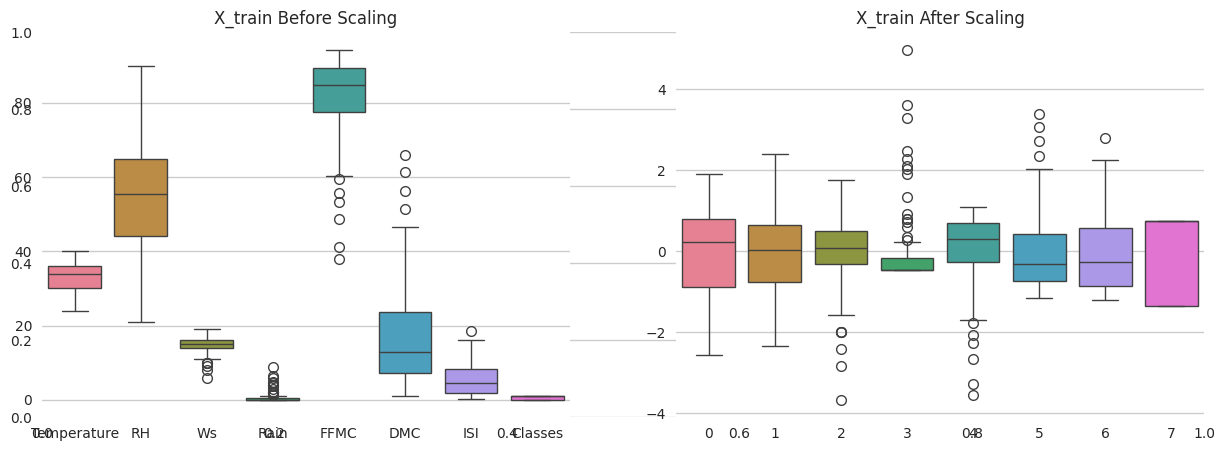

In [41]:
plt.subplots(figsize = (15, 5))
plt.subplot(1, 2, 1)
sns.boxplot(data = X_train)
plt.title('X_train Before Scaling')
plt.subplot(1, 2, 2)
sns.boxplot(data = X_train_scaled)
plt.title('X_train After Scaling')

# Linear Regression Model

In [42]:
mae_dict = {}
mse_dict = {}
r2 = {}

Mean Absolute Error: 1.1907027684969123
Mean Squared Error: 8.096823062512202
R2 Score: 0.843883547117065


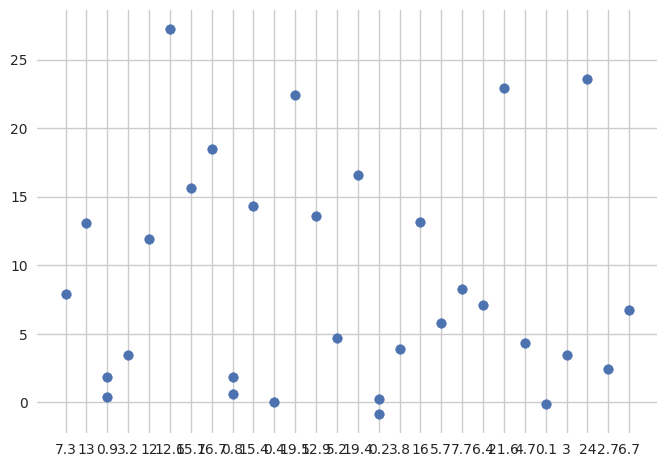

In [43]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics import r2_score
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)
y_pred = lr.predict(X_test_scaled)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
score = r2_score(y_test, y_pred)
print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'R2 Score: {score}')
plt.scatter(y_test, y_pred)

mae_dict['LinearRegression'] = mae
mse_dict['LinearRegression'] = mse
r2['LinearRegression'] = score

# Lasso Regression

In [44]:
df_copy['Classes'].value_counts()

Classes
1    78
0    43
Name: count, dtype: int64

Mean absolute error: 1.3533285014629628
Mean Squared error: 5.928190960375712
R2 Score: 0.8856973732041287


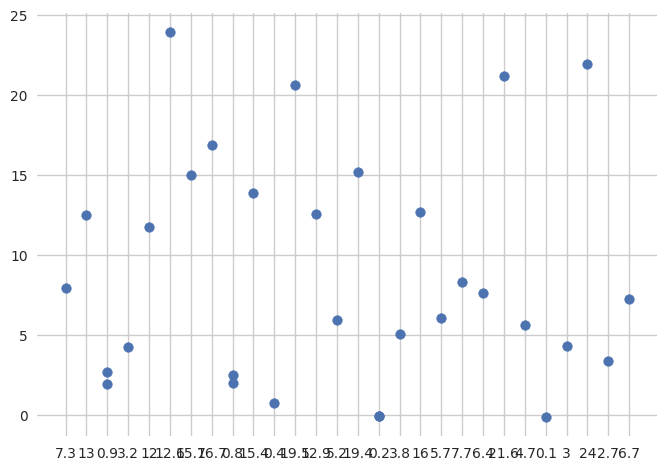

In [45]:
from sklearn.linear_model import Lasso
lasso = Lasso()
lasso.fit(X_train_scaled, y_train)
y_pred = lasso.predict(X_test_scaled)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
score = r2_score(y_test, y_pred)
print(f"Mean absolute error: {mae}")
print(f"Mean Squared error: {mse}")
print(f"R2 Score: {score}")
plt.scatter(y_test, y_pred)

# Cross Validation Using Lasso

In [46]:
from sklearn.linear_model import LassoCV
lassocv = LassoCV(cv = 5)
lassocv.fit(X_train_scaled, y_train)

LassoCV(cv=5)

In [47]:
lassocv.alpha_

np.float64(0.015831590623716193)

In [48]:
lassocv.alphas_

array([7.87941996, 7.34837343, 6.85311765, 6.39124046, 5.96049224,
       5.55877501, 5.18413218, 4.83473902, 4.5088938 , 4.20500944,
       3.92160588, 3.65730277, 3.4108128 , 3.18093544, 2.96655103,
       2.76661542, 2.5801548 , 2.406261  , 2.24408707, 2.09284311,
       1.95179249, 1.82024821, 1.69756957, 1.58315906, 1.47645944,
       1.37695102, 1.28414913, 1.19760177, 1.11688742, 1.04161295,
       0.97141172, 0.90594182, 0.84488438, 0.787942  , 0.73483734,
       0.68531177, 0.63912405, 0.59604922, 0.5558775 , 0.51841322,
       0.4834739 , 0.45088938, 0.42050094, 0.39216059, 0.36573028,
       0.34108128, 0.31809354, 0.2966551 , 0.27666154, 0.25801548,
       0.2406261 , 0.22440871, 0.20928431, 0.19517925, 0.18202482,
       0.16975696, 0.15831591, 0.14764594, 0.1376951 , 0.12841491,
       0.11976018, 0.11168874, 0.10416129, 0.09714117, 0.09059418,
       0.08448844, 0.0787942 , 0.07348373, 0.06853118, 0.0639124 ,
       0.05960492, 0.05558775, 0.05184132, 0.04834739, 0.04508

Mean absolute error: 1.1820344548730033
Mean squared error: 7.944651928267569
R2 score: 0.8468175889660756


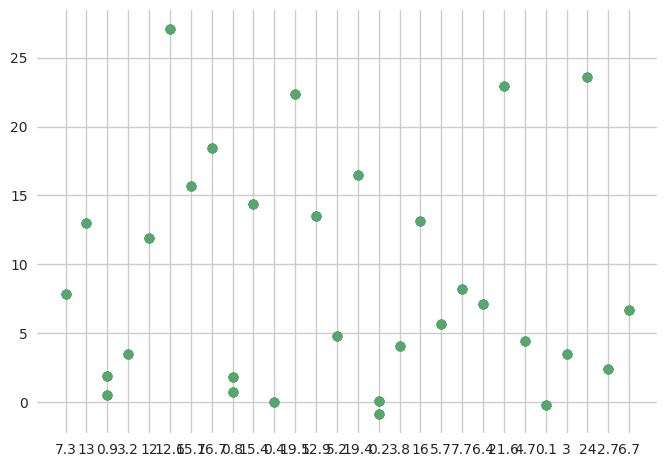

In [49]:
y_pred = lassocv.predict(X_test_scaled)
plt.scatter(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
score = r2_score(y_test, y_pred)
print(f'Mean absolute error: {mae}')
print(f'Mean squared error: {mse}')
print(f'R2 score: {score}')
plt.scatter(y_test, y_pred)

mae_dict['lassoCV'] = mae
mse_dict['lassoCV'] = mse
r2['lassoCV'] = score

# Ridge Model

Mean absolute error: 1.16138264916712
Mean Squared error: 7.601251553750899
R2 Score: 0.8534387597603872


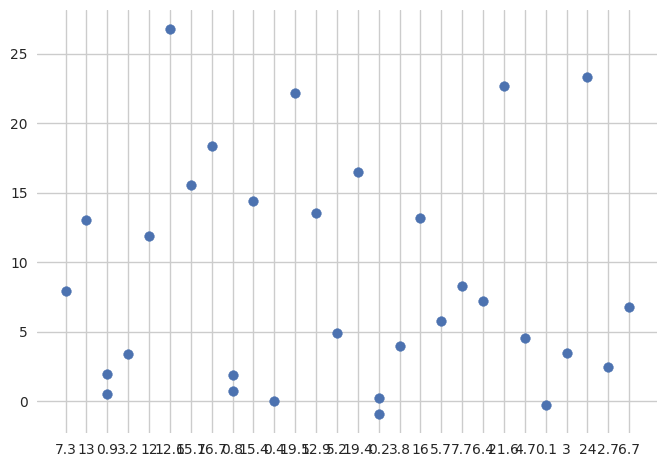

In [50]:
from sklearn.linear_model import Ridge
ridge = Ridge()
ridge.fit(X_train_scaled, y_train)
y_pred = ridge.predict(X_test_scaled)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
score = r2_score(y_test, y_pred)
print(f"Mean absolute error: {mae}")
print(f"Mean Squared error: {mse}")
print(f"R2 Score: {score}")
plt.scatter(y_test, y_pred)

In [51]:
from sklearn.linear_model import RidgeCV
ridgecv = RidgeCV(cv = 5)
ridgecv.fit(X_train_scaled, y_train)

RidgeCV(cv=5)

Mean absolute error: 1.1876113536211872
Mean squared error: 8.042776492856671
R2 score: 0.8449256297561407


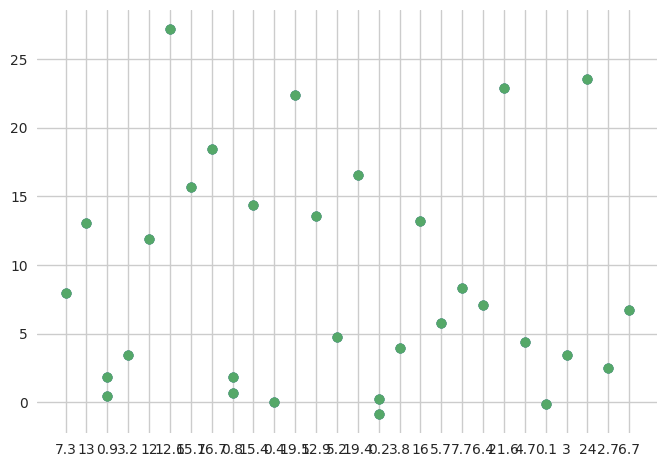

In [52]:
y_pred = ridgecv.predict(X_test_scaled)
plt.scatter(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
score = r2_score(y_test, y_pred)
print(f'Mean absolute error: {mae}')
print(f'Mean squared error: {mse}')
print(f'R2 score: {score}')
plt.scatter(y_test, y_pred)

mae_dict['ridgeCV'] = mae
mse_dict['ridgeCV'] = mse
r2['ridgeCV'] = score

In [53]:
ridgecv.get_params()

{'alpha_per_target': False,
 'alphas': (0.1, 1.0, 10.0),
 'cv': 5,
 'fit_intercept': True,
 'gcv_mode': None,
 'scoring': None,
 'store_cv_results': None,
 'store_cv_values': 'deprecated'}

Mean absolute error: 1.9014310977912219
Mean Squared error: 5.86450203162437
R2 Score: 0.8869253720831716


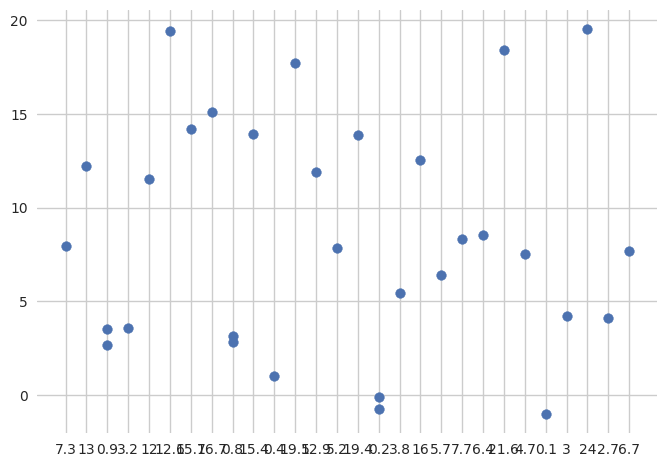

In [54]:
from sklearn.linear_model import ElasticNet
elastic = ElasticNet()
elastic.fit(X_train_scaled, y_train)
y_pred = elastic.predict(X_test_scaled)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
score = r2_score(y_test, y_pred)
print(f"Mean absolute error: {mae}")
print(f"Mean Squared error: {mse}")
print(f"R2 Score: {score}")
plt.scatter(y_test, y_pred)

In [55]:
elastic.get_params()

{'alpha': 1.0,
 'copy_X': True,
 'fit_intercept': True,
 'l1_ratio': 0.5,
 'max_iter': 1000,
 'positive': False,
 'precompute': False,
 'random_state': None,
 'selection': 'cyclic',
 'tol': 0.0001,
 'warm_start': False}

Mean absolute error: 1.1623023646683093
Mean squared error: 7.663673982176985
R2 score: 0.8522351805255464


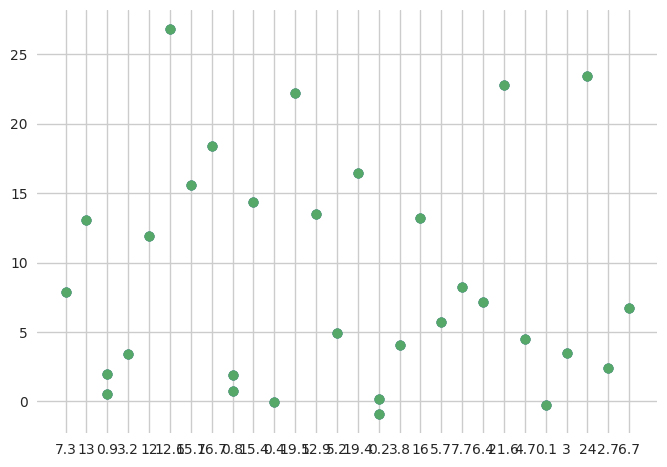

In [56]:
from sklearn.linear_model import ElasticNetCV
elasticcv = ElasticNetCV(cv = 5)
elasticcv.fit(X_train_scaled, y_train)
y_pred = elasticcv.predict(X_test_scaled)
plt.scatter(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
score = r2_score(y_test, y_pred)
print(f'Mean absolute error: {mae}')
print(f'Mean squared error: {mse}')
print(f'R2 score: {score}')
plt.scatter(y_test, y_pred)

mae_dict['elasticnetCV'] = mae
mse_dict['elasticnetCV'] = mse
r2['elasticnetCV'] = score

In [57]:
elasticcv.alpha_

np.float64(0.015758839919018962)

In [58]:
elasticcv.alphas_

array([15.75883992, 14.69674685, 13.7062353 , 12.78248092, 11.92098448,
       11.11755003, 10.36826436,  9.66947805,  9.01778759,  8.41001889,
        7.84321176,  7.31460554,  6.82162561,  6.36187087,  5.93310207,
        5.53323085,  5.16030961,  4.81252201,  4.48817413,  4.18568622,
        3.90358498,  3.64049641,  3.39513914,  3.16631812,  2.95291888,
        2.75390203,  2.56829825,  2.39520354,  2.23377484,  2.08322589,
        1.94282344,  1.81188364,  1.68976875,  1.57588399,  1.46967469,
        1.37062353,  1.27824809,  1.19209845,  1.111755  ,  1.03682644,
        0.9669478 ,  0.90177876,  0.84100189,  0.78432118,  0.73146055,
        0.68216256,  0.63618709,  0.59331021,  0.55332308,  0.51603096,
        0.4812522 ,  0.44881741,  0.41856862,  0.3903585 ,  0.36404964,
        0.33951391,  0.31663181,  0.29529189,  0.2753902 ,  0.25682983,
        0.23952035,  0.22337748,  0.20832259,  0.19428234,  0.18118836,
        0.16897688,  0.1575884 ,  0.14696747,  0.13706235,  0.12

# Pickle the Machine Learning models, Preprocessing model StandardScaler

/tmp/ipykernel_32823/377653158.py:19: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title="Metrics", fontsize=10)


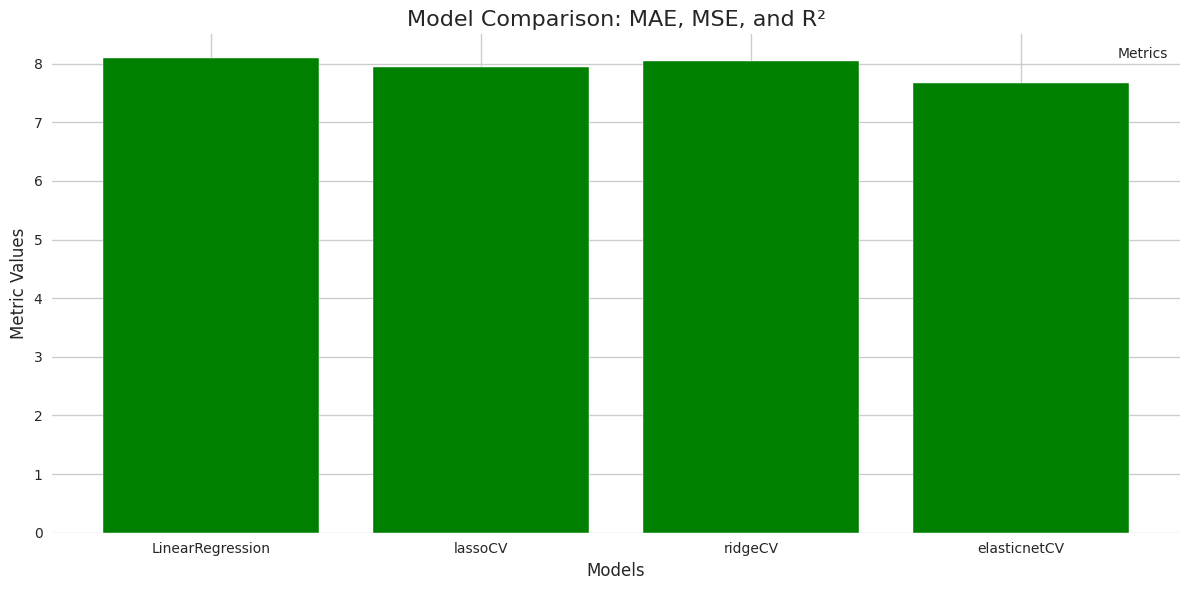

In [59]:
models = list(mae_dict.keys())  
mae_values = list(mae_dict.values())
mse_values = list(mse_dict.values())
r2_values = list(r2.values())


# Create the bar plot
plt.figure(figsize=(12, 6))

# Plot bars for MAE, MSE, and R2
#plt.bar(x - width, mae_values, width, label='MAE', color='skyblue')
#plt.bar(x, mse_values, width, label='MSE', color='orange')
plt.bar(models, mse_values, color='green')

# Add labels, title, and legend
plt.xlabel('Models', fontsize=12)
plt.ylabel('Metric Values', fontsize=12)
plt.title('Model Comparison: MAE, MSE, and R²', fontsize=16)
plt.legend(title="Metrics", fontsize=10)

# Adjust layout and show plot
plt.tight_layout()
plt.show()

In [60]:
## Pickle the machine learning models, preprocessing model standard scaler.

In [61]:
sc

StandardScaler()

In [62]:
elastic

ElasticNet()

In [63]:
import pickle
pickle.dump(sc, open('scaler.pkl', 'wb'))
pickle.dump(elastic, open('elastic.pkl', 'wb'))